# Assignment 3 
Statistics for understanding the market



In this assignment, your goal is to find the stocks that is well suited for your investment. The list below is the step-by-step to choose the stock.

1. Use Python to donwload the historical prices from Jaunary 1, 2020 to December 21, 2020 from Yahoo Finance. Here, we are interested in the top 48 stocks in the market. All symbols of all 48 stocks are given in the "set48.txt" attached with the assignment in Google Classroom. 


In [2]:
import csv 
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
set48 = ['ADVANC','AOT','BBL','BDMS','BEM','BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']

In [4]:
for stock in set48:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21")

2. Next, you want to find the top **five** stocks with the highest average return. Please add the average annualized return (RET) of the top five stock by computing the average daily return and multiply with 250 (Here, we assume that there are 250 trading days in a year.). You must put your results by filling the blank below:
The stocks are


  1.  ______________________ with ________________ % of return
  2.   ______________________ with ________________ % of return
  3.   ______________________ with ________________ % of return
  4.   ______________________ with ________________ % of return
  5.   ______________________ with ________________ % of return


In [5]:
hs = {}
for stock in set48:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    avg_ret = daily_ret.mean()
    RET = avg_ret*250*100
    if RET >= 0:
        hs[stock] = RET
        
highest = sorted(hs.items(), key=lambda x: x[1], reverse = True)
for i in highest[0:5]:
    print(f'{i[0]} with {i[1]:.2f}% of return')

KTC with 48.78% of return
CBG with 42.01% of return
GLOBAL with 29.42% of return
IVL with 20.45% of return
PTTGC with 15.92% of return


3. You also concern about the risk. As a result, you want stock with the lowest volatility. Here. the volatilities are measured by the standard deviations (STDs), Report stocks with the five lowest volatilities and compute their corresponding annualized STD by multiply the daily STD with the square root of 250.(√250  )  
The stocks are 
  1.   ______ with ____ % of volatility
  2.   ______ with ____ % of volatility
  3.   ______ with ____ % of volatility
  4.   ______ with ____ % of volatility
  5.   ______ with ____ % of volatility

In [6]:
st = {}
for stock in set48:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    std_ret = daily_ret.std()
    vola = std_ret*np.sqrt(250)*100
    st[stock] = vola
        
volatility = sorted(st.items(), key=lambda x: x[1])
for i in volatility[0:5]:
    print(f'{i[0]} with {i[1]:.2f}% of volatility')

CPALL with 26.30% of volatility
TTW with 26.37% of volatility
ADVANC with 26.96% of volatility
INTUCH with 29.99% of volatility
SCC with 35.63% of volatility


4. Furthermore, the volatility and return should be compared. A stock with the same level of return the one with lower volatility is more preferable. Thus, in this part, you will compute the coefficient of variation (CV) defined as (STD/RET). Here, a stock with lower CV is less volatile. However, we should look only the stock with positive return. Hence, find the op 5 stocks with the **lowest CV** and the **positive return**:

The stocks are
  1.   ______ with CV of ____ 
  2.   ______ with CV of ____ 
  3.   ______ with CV of ____ 
  4.   ______ with CV of ____ 
  5.   ______ with CV of ____ 



In [7]:
cv = {}
low_cv = []
for stock in set48:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    avg_ret = daily_ret.mean()
    RET = avg_ret*250*100
    std_ret = daily_ret.std()
    vola = std_ret*np.sqrt(250)*100
    coef = vola/RET
    if coef>=0:
        cv[stock] = coef
        
coef_var = sorted(cv.items(), key=lambda x: x[1])
for i in coef_var[0:5]:
    print(f'{i[0]} with CV of {i[1]:.2f}')
    low_cv.append(i)

KTC with CV of 1.08
CBG with CV of 1.28
GLOBAL with CV of 1.79
IVL with CV of 3.08
PTTGC with CV of 3.85


5. From the stock in Part 4. Use the stock with lowest CV and plot histogram of the annualized return.


(array([ 1.,  0.,  1.,  0.,  0.,  2.,  0.,  3.,  5., 12., 18., 48., 67.,
        42., 19.,  8.,  4.,  2.,  1.,  2.]),
 array([-45.62044244, -41.86214767, -38.10385291, -34.34555814,
        -30.58726337, -26.8289686 , -23.07067383, -19.31237906,
        -15.55408429, -11.79578953,  -8.03749476,  -4.27919999,
         -0.52090522,   3.23738955,   6.99568432,  10.75397908,
         14.51227385,  18.27056862,  22.02886339,  25.78715816,
         29.54545293]),
 <a list of 20 Patch objects>)

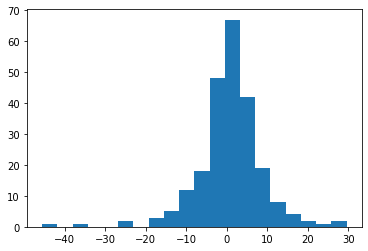

In [8]:
df = data.DataReader("KTC.BK", "yahoo", "2020-01-01", "2020-12-21") 
daily_ret = df['Adj Close'].pct_change(1).dropna()*250
plt.hist(daily_ret, bins=20)

6. The investment is risky. To control the risk, a good investor will diversify their portfolio with securities that have negative correlations. Find the two stocks with lowest (more negative) correlations 
Stock 1_________ Stock 2__________ with correlation of ___________________.

In [17]:
s48 = dict()
for stock in set48:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    s48[stock] = daily_ret
        
s48 = pd.DataFrame(s48) 
Stock_low = []
for i in set48:
    if s48.corr()[i].values.min() == s48.corr().values.min():
        Stock_low.append(i)
print(f"{Stock_low}")

['MINT', 'TU']


In [21]:
print(s48.corr().values.min())

0.0928271321018655


7.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 1 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _______________________

In [10]:
wealth = 1000000
df = data.DataReader("MINT.BK", "yahoo", "2020-01-01", "2020-12-21") 
price_first = wealth / df['Adj Close'].values[0]
price_last = price_first * df['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on MINT: {price_last:,.2f}")

Total Wealth on the last day by investing 1,000,000 on MINT: 716,524.85


8.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 2 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _______________________

In [11]:
wealth = 1000000
df = data.DataReader("TU.BK", "yahoo", "2020-01-01", "2020-12-21") 
price_first = wealth / df['Adj Close'].values[0]
price_last = stock_at_day_1 * df['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on TU: {price_last:,.2f}")

Total Wealth on the last day by investing 1,000,000 on TU: 1,014,758.39


9.From two stocks in Part 6. If an intestor invest 0.5 million THB on Stock 1 and 0.5 million THB on Stock 2 on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _________________

In [12]:
MT = ['MINT', 'TU']
for stock in MT:
    wealth = 500000
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    stock_at_day_1 = wealth / df['Adj Close'].values[0]
    wealth_last_day = stock_at_day_1 * df['Adj Close'].values[-1]
    print(f"Total Wealth on the last day by investing {wealth:,} on {stock}: {wealth_last_day:,.2f}")

Total Wealth on the last day by investing 500,000 on MINT: 358,262.43
Total Wealth on the last day by investing 500,000 on TU: 507,379.20
